#TP4: Segmentation for well detection 

Imane Elbacha 
imane.elbacha@etu.emse.fr

Well detection using image segmentation is a vital task in the field of oil and gas exploration. The accurate detection of wells from satellite or ground images is necessary for various purposes such as oil and gas exploration, monitoring of groundwater resources, and environmental studies. Image segmentation is a popular technique for detecting objects of interest in an image. It involves partitioning the image into multiple segments, where each segment corresponds to a distinct object or region in the image. In the case of well detection, image segmentation algorithms can be used to identify the wellbore, well pad, and surrounding terrain features. This can enable the extraction of valuable information such as the location, depth, and size of the well, which can aid in decision-making processes related to oil and gas exploration and environmental monitoring. In this project, we aim to develop an efficient and accurate well detection system using image segmentation techniques.


In this project, we are specifically focusing on the task of well detection using image segmentation. We plan to develop an automated system that can accurately detect and segment well structures from satellite or ground images. The project will involve preprocessing the images to enhance their quality and reduce noise. Next, we will explore and evaluate different image segmentation algorithms such as thresholding, region-based segmentation, and edge-based segmentation. We will also investigate the use of deep learning-based approaches such as convolutional neural networks (CNNs) for well detection. The performance of the segmentation algorithms will be evaluated using metrics such as precision, recall, and F1 score. Finally, we aim to integrate the segmentation algorithms into a complete well detection system that can identify the wellbore, well pad, and surrounding terrain features.

To start the project, we can follow the following plan:

1-Gather and preprocess the data: Collect a dataset of satellite or ground images containing wells and preprocess the images to enhance their quality and reduce noise.

2-Explore image segmentation techniques: Investigate various image segmentation algorithms such as thresholding, region-based segmentation, and edge-based segmentation. Also, explore the use of deep learning-based approaches such as CNNs for well detection.

3-Evaluate the performance of segmentation algorithms: Use metrics such as precision, recall, and F1 score to evaluate the performance of segmentation algorithms.

4-Develop a complete well detection system: Integrate the best-performing segmentation algorithm into a complete well detection system that can identify the wellbore, well pad, and surrounding terrain features.

5-Test and refine the system: Test the system on a validation set and refine the system based on feedback.

6-Document the findings: Document the project findings and present them 

>[TP4: Segmentation for well detection](#scrollTo=pc_5QD9pWEt1)

>[0.Project environement set up](#scrollTo=mAmMvnRPXdIb)

>>[0.1 Imports and libraries](#scrollTo=P4Q1QxkNXhW-)

>>[0.2 Data retreival](#scrollTo=vi_GoUFRXv-k)

>>[0.3 Utils: Processing and training](#scrollTo=KCwR0CW1Xzed)

>>>[0.3.1 Data processing functions](#scrollTo=Q4hgp5lYgFGT)

>>>[0.3.1 Training and validation functions](#scrollTo=zJyz0ZUCgKbI)

>>[0.4 Parameters](#scrollTo=FWUPx2vVg_CP)

>[1 . DATA: visualization and training set up](#scrollTo=f8bg7QUzfmTq)

>>[1.1 Data vizualization](#scrollTo=c70yxqWyf2EX)

>>[1.2 Data distribution: validation and training](#scrollTo=WSDoc1Afjx_-)

>>[1.3 Dataloader set up](#scrollTo=41DUf2sJpUj8)

>[2.Segmentation model](#scrollTo=W0Z9FHgr0Cz3)

>>[2.1 Simple Unet](#scrollTo=bMlKlAS4rQcQ)

>>[2.2 Transfer learning](#scrollTo=LR7oWiPXrUDI)

>>[2.3 Training](#scrollTo=W3sdRmq3rZ7D)

>>[2.4 Analysis and vizualization](#scrollTo=tT0veBghrgcV)

>>[2.5 Evaluation](#scrollTo=d75pPnXtcITp)

>[3 . CONCLUSION](#scrollTo=-2scdXFa2tyi)



# 0.Project environement set up

## 0.1 Imports and libraries

In [1]:
import os
import numpy as np  # For array operations and numerical calculations
import matplotlib.pyplot as plt # For visualizing images and results
import cv2  # For image processing and computer vision tasks
import pandas as pd #for dataset reading and writing 
from sklearn.metrics import precision_score, recall_score, f1_score  # For evaluating model performance

import torch  # For building and training deep learning models
import torchvision.transforms as T  # For applying image transformations
from torch.utils import data as data_torch
from torch.utils.data import Dataset, DataLoader  # For loading and preprocessing the data
from torch import nn  # For defining the neural network architecture
from torch.nn import functional as F  # For using activation functions
from torch.optim import Adam  # For optimizing the neural network parameters

import scipy.ndimage as ndimage  # Used for image filtering and processing
import random  # Used for generating random numbers
from sklearn.preprocessing import RobustScaler  # Used for robust scaling of data
import cv2  # Used for image processing and resizing
from skimage.transform import resize  # Used for image resizing
from skimage import img_as_bool  # Used for converting image to boolean values



## 0.2 Data retreival

In [2]:
import gdown
#url=f'https://drive.google.com/drive/u/1/folders/194qwGjO4IRog1xU8NsukPQLi78ptL91k'
url= f'https://drive.google.com/drive/folders/194qwGjO4IRog1xU8NsukPQLi78ptL91k?usp=share_link'
gdown.download_folder(url,quiet=False)

Retrieving folder list


Retrieving folder 1PcIeyznnoEEiSvHW-0pIixOeqQXYC_9t data
Retrieving folder 1kzt0v-cmeHL6ezmLUd4FUjvr7AceA12T Test
Retrieving folder 1Q0EZigfYeMtapHnqbJHPn4muCvu-K7s1 22_11-N6_dwl_DWL_OTHER_159382242_15B
Processing file 189VbxdkeVwiY7ScO9ywn7YlTj7YjxByc Image.npy
Processing file 11add398Qji1cgL6PgXP5YGuJRN6VRWzw Label.npy
Retrieving folder 1Xmcfpb5a96U1j2FiTRwNq7sHKljOit7u 211_29-A22Z_dwl_DWL_WIRE_265959676_30B
Processing file 1utVDoXtnfdfdHTjr8Gr49sKtN_eqHioz Image.npy
Processing file 1JsyyIcBG5jM8MecOZkgDV-7Xj2_HSAxj Label.npy
Retrieving folder 12F3O2P8D3SOSFnmkhhXMH6Y__dC7MPHL 211_29-A22Z_dwl_DWL_WIRE_265959847_30B
Processing file 1w52UQSTTFrZEf1sW4uPzYH__Ygx6xGsb Image.npy
Processing file 1d2dSFqah_NlANjjbj-gIbQESg2Vf_lGu Label.npy
Retrieving folder 13l1U6dM_F8OMjcUb-uU4izSjKlf3_7dE 211_29-A47_dwl_DWL_WIRE_256691557_30B
Processing file 1PH_kcL07162rEv7GkKPeD13eDXxBNcSV Image.npy
Processing file 1JzISP5_VFsj4m8MM0YSRyFgMqqJBD2k1 Label.npy
Retrieving folder 1K4qNMG3AfAg3gBQhwZITk6_F1R

Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=189VbxdkeVwiY7ScO9ywn7YlTj7YjxByc
To: /content/TP4/data/Test/22_11-N6_dwl_DWL_OTHER_159382242_15B/Image.npy
100%|██████████| 10.2M/10.2M [00:00<00:00, 33.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=11add398Qji1cgL6PgXP5YGuJRN6VRWzw
To: /content/TP4/data/Test/22_11-N6_dwl_DWL_OTHER_159382242_15B/Label.npy
100%|██████████| 2.55M/2.55M [00:00<00:00, 71.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1utVDoXtnfdfdHTjr8Gr49sKtN_eqHioz
To: /content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959676_30B/Image.npy
100%|██████████| 131k/131k [00:00<00:00, 85.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JsyyIcBG5jM8MecOZkgDV-7Xj2_HSAxj
To: /content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959676_30B/Label.npy
100%|██████████| 32.7k/32.7k [00:00<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w52UQSTTFrZEf1sW4uPzYH__Ygx6xGs

['/content/TP4/data/Test/22_11-N6_dwl_DWL_OTHER_159382242_15B/Image.npy',
 '/content/TP4/data/Test/22_11-N6_dwl_DWL_OTHER_159382242_15B/Label.npy',
 '/content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959676_30B/Image.npy',
 '/content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959676_30B/Label.npy',
 '/content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959847_30B/Image.npy',
 '/content/TP4/data/Test/211_29-A22Z_dwl_DWL_WIRE_265959847_30B/Label.npy',
 '/content/TP4/data/Test/211_29-A47_dwl_DWL_WIRE_256691557_30B/Image.npy',
 '/content/TP4/data/Test/211_29-A47_dwl_DWL_WIRE_256691557_30B/Label.npy',
 '/content/TP4/data/Test/211_29-D65Z_dwl_1993345_15B/Image.npy',
 '/content/TP4/data/Test/211_29-D65Z_dwl_1993345_15B/Label.npy',
 '/content/TP4/data/Train/9_13a-A69_dwl_DWL_WIRE_163547241_30B/Image.npy',
 '/content/TP4/data/Train/9_13a-A69_dwl_DWL_WIRE_163547241_30B/Label.npy',
 '/content/TP4/data/Train/9_13a-N3Z_dwl_DWL_WIRE_215588117_30B/Image.npy',
 '/content/TP4/data/Train/9_13a-N3Z_dwl_DWL

## 0.3 Utils: Processing and training

### 0.3.1 Data processing functions

In [3]:
####################
### Utils Functions
#####################

def preprocess_functions(well_data_raw, truncate, debugg=False):
    """
    Preprocesses the raw well data.

    Args:
        well_data_raw (numpy.ndarray): Raw well data.
        truncate (bool): Whether to truncate the data.
        debugg (bool): Whether to enable debug logging. Default is False.

    Returns:
        numpy.ndarray: Preprocessed well data.
    """

    well_data = well_data_raw.copy()
    # specific preprocessing

    return well_data


In [4]:
def create_patches_scale(well_data, label_data, size_image_model, scale):
    """
    Creates patches of the well data at a given scale and creates corresponding labels for the patches.

    Args:
        well_data (numpy.ndarray): Well data.
        label_data (numpy.ndarray): Label data.
        size_image_model (tuple): Size of the image model.
        scale (int): Scale at which to create the patches.

    Returns:
        numpy.ndarray: Patches of the well data.
        numpy.ndarray: Corresponding labels for the patches.
    """

    patches_data = []
    patches_label = []

    size_images = well_data.shape

    sliding_window = size_images[1]*scale

    for depth_i in range(0, well_data.shape[0], sliding_window):

        patch_tmp = well_data[depth_i:depth_i+scale*size_images[1],:]
        patch_label = label_data[depth_i:depth_i+scale*size_images[1],:]
        patch_label = patch_label.astype(float)

        patch_tmp = resize(patch_tmp, (size_image_model[1]*scale, size_image_model[1]))
        patch_label = resize(patch_label, (size_image_model[1]*scale, size_image_model[1]))

        if scale>1:
            patch_tmp = pyrDownVertical(patch_tmp, scale)
            patch_label = pyrDownVertical(patch_label, scale)

        label_log = np.max(patch_label, axis=1)

        percentage = 100*np.mean(label_log)

        if percentage>20:
            label = 1
        else:
            label = 0

        patches_data.append(patch_tmp)
        patches_label.append(patch_label)
        #patches_label.append(label)

    return np.array(patches_data), np.array(patches_label)

In [5]:
def pyrDownVertical(patch, scale):
    """
    Downsamples the input patch in the vertical direction by a factor of `scale`.

    Args:
        patch (numpy.ndarray): Input patch.
        scale (int): Scaling factor.

    Returns:
        numpy.ndarray: Downsampled patch.
    """

    sigma_default = 0.1
    patch_filter = ndimage.gaussian_filter(patch, sigma=(sigma_default*scale, sigma_default))
    patch_results = patch_filter[::scale, :]
    return patch_results

In [6]:
def show(imgs):
    """
    Displays the input image.

    Args:
        imgs (list): List of input images.
    """

    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = np.transpose(img, (1,2,0))
        print(img.shape)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [7]:
def show_images(list_images, list_titles, nameDir, v_min, v_max, cmap_='inferno', save=True, display=False):
    
    # display the list of images on 1 line
    nbr_plots = len(list_images)
    fig = plt.figure(figsize=(17, 5))

    for i in range(0,nbr_plots):
        if list_images[i].shape[0]<=3 and len(list_images[i].shape)==3:
            list_images[i] = np.transpose(list_images[i], (1,2,0))
        else:
            pass
        plt.subplot(1, nbr_plots, i+1)
        if len(list(list_images[i].shape))==3:
            plt.imshow(list_images[i][:,:,0], vmin = v_min, vmax=v_max, cmap=cmap_)
        else:
            plt.imshow(list_images[i])
        plt.title(str(list_titles[i]))
        plt.axis('off')
    if display:
        plt.show()



### 0.3.1 Training and validation functions

In [8]:
class ImageCustomLoader_gray(data_torch.Dataset):
    def __init__(self, list_patches, list_labels, size_img):
        """
        Constructor of the ImageCustomLoader_gray class.
        
        Parameters:
        - list_patches: A list of image patches.
        - list_labels: A list of labels.
        - size_img: A tuple of image dimensions.
        """
        self.list_patches = list_patches
        self.list_labels = list_labels
        self.size_img = size_img
        
    def __getitem__(self, index):
        """
        Function to retrieve an image patch and its label from the dataset.
        
        Parameters:
        - index: An integer indicating the index of the sample to retrieve.
        
        Returns:
        - patch: A numpy array of the image patch.
        - label: A numpy array of the label.
        """
        patch = self.list_patches[index]
        label = self.list_labels[index]

        #patch = # normalization
        return patch, label
        
    def __len__(self):
        """
        Function to retrieve the length of the dataset.
        
        Returns:
        - length: An integer indicating the number of samples in the dataset.
        """
        return len(self.list_patches)


In [9]:
class ImageCustomLoader(data_torch.Dataset):
    def __init__(self, list_patches, list_labels, size_img, nbr_channels, size_img_model):
        """
        Constructor of the ImageCustomLoader class.
        
        Parameters:
        - list_patches: A list of image patches.
        - list_labels: A list of labels.
        - size_img: A tuple of image dimensions.
        - nbr_channels: An integer indicating the number of image channels.
        - size_img_model: A tuple of image dimensions for model inputs.
        """
        self.list_patches = list_patches
        self.list_labels = list_labels
        self.size_img = size_img
        self.nbr_channels = nbr_channels
        self.size_img_model = size_img_model        

    def __getitem__(self, index):
        """
        Function to retrieve an image patch and its label from the dataset.
        
        Parameters:
        - index: An integer indicating the index of the sample to retrieve.
        
        Returns:
        - patch: A numpy array of the image patch.
        - label: A numpy array of the label.
        """
        patch = self.list_patches[index]
        label = self.list_labels[index]
        patch = RobustScaler().fit_transform((patch).reshape(-1,1)).reshape(self.size_img[0], self.size_img[1])
        patch =  resize(patch, self.size_img_model)

#         label =  resize(label, self.size_img_model)
#         label =  img_as_bool(resize(label, self.size_img_model))*1 #To do: Clean the code

        if self.nbr_channels == 1 :
            return patch, label

        else :
            patch_1D = np.expand_dims(patch, axis=0)
            patch_3D = np.concatenate((patch_1D, patch_1D, patch_1D), axis=0)
            return patch_3D, label

    def __len__(self):
        """
        Function to retrieve the length of the dataset.
        
        Returns:
        - length: An integer indicating the number of samples in the dataset.
        """
        return len(self.list_patches)

In [10]:
# train function with train and validation partitions
class training_train_val:
    """
    This class trains a PyTorch model with train and validation partitions.
    """
    def __init__(self, model, num_channels, optimizer, loss_function, path2Save, num_epochs, 
                 partitions, dataloaders, device, dataset_sizes, num_epochs_0, scheduler, **kwargs):
        """
        Initializes the Trainer object.

        :param model: the PyTorch model to be trained
        :param num_channels: the number of channels in the input data
        :param optimizer: the optimizer to be used for training
        :param loss_function: the loss function to be used for training
        :param path2save: a dictionary containing the path to save the trained model and results
        :param num_epochs: the total number of epochs to train the model for
        :param partitions: a list containing the names of the partitions to be used for training and validation
        :param dataloaders: a dictionary containing the data loaders for each partition
        :param device: the device (CPU or GPU) to be used for training
        :param dataset_sizes: a dictionary containing the size of each dataset
        :param num_epochs_0: the starting epoch number (useful when continuing training from a checkpoint)
        :param scheduler: the learning rate scheduler (optional)
        """
        self.model = model
        self.optimizer = optimizer
        self.loss_function = loss_function
        self.path2Save = path2Save
        self.num_epochs = num_epochs
        self.dataloaders = dataloaders
        self.partitions = partitions
        self.device = device
        self.dataset_sizes = dataset_sizes
        self.num_epochs_0 = num_epochs_0
        self.num_channels = num_channels
        self.scheduler = scheduler

    def train(self):
        """
        Trains the PyTorch model using the specified parameters.
        """
        device = self.device
        model_name = self.path2Save['modelName']
        results_dir = self.path2Save['resultsDir'] 
        path_model = os.path.join(results_dir, model_name, 'models')
        loss_results = {'train':[],\
                        'val':[]}
        display_debug = False
        batchSize = 10
        
        self.model.to(self.device)
        
        for epoch in range(self.num_epochs_0, self.num_epochs ):
            #print(epoch)
            iter_current = 0
            loss_epoch = 0
            for phase in self.partitions:           
                if phase == self.partitions[0]:
                    self.model.train()
                else:
                    self.model.eval() 
                running_loss = 0.0
                
                for k, batch_data in enumerate(self.dataloaders[phase]):
                    #print(k)
                    patches, labels  = batch_data
                    
                    if self.num_channels == 1:
                        patches = patches.unsqueeze(1)
                    patches = patches.float() 
        
                    patches = patches.to(device)
                    #labels = labels.unsqueeze(1)
                   
                    labels = labels.to(device)
                    self.optimizer.zero_grad()
                    
                    #===================
                    # Forward
                    #=====================
                    with torch.set_grad_enabled(phase == self.partitions[0]):
                        
                        groove_pred = self.model(patches)
                        #print(groove_pred)
                        groove_pred = groove_pred.to(device)
                        #groove_pred = nn.Sigmoid()(groove_pred)
                       
                        #=====================
                        # Compute loss
                        #=====================
                        groove_pred=groove_pred.squeeze()
                        labels=labels.squeeze()
                        #print('g',groove_pred.float().shape)
                        #print('L',labels.float().shape)
                        #print(groove_pred)
                        #print(labels)
                        loss = self.loss_function(groove_pred.float(), labels.float())
                        loss = loss.to(device)
                        
                    #===================
                    # backward
                    #=====================
                    if phase == self.partitions[0]:
                        loss.backward()
                        self.optimizer.step()
                        
                    running_loss += loss.item()

                    iter_current += 1
                    #print(iter_current)
                loss_epoch =  running_loss / float(self.dataset_sizes[phase])

                if iter_current%100 == 0:
                    print('iter-%s'%iter_current)
                
                print("%s || epoch-%s: lossB = %.5f"%(phase, epoch, loss_epoch))
                if display_debug:
                    print('Images ' + str(phase))
                    print(patches.size())
                    v_min = np.min(patches[0:10,0,:,:].detach().cpu().numpy())
                    v_max = np.max(patches[0:10,0,:,:].detach().cpu().numpy())
                    
                    labels = groove_pred[0:10, :].detach().cpu().numpy()
                    
                    show_images(list(patches[0:10,0,:,:].detach().cpu().numpy()), labels, './' ,v_min, v_max,save=False, display=True )
#                     print('Feature Maps ' + str(phase))
#                     v_min = np.min(seg_dip[0:10,0,:,:].detach().cpu().numpy())
#                     v_max = np.max(seg_dip[0:10,0,:,:].detach().cpu().numpy())
#                     show_images(list(seg_dip[0:10,0,:,:].detach().cpu().numpy()), ['']*10, './' ,v_min, v_max,save=False, display=True )
                            
                
                loss_results[phase].append(loss_epoch)               
                #self.scheduler.step()
               
            torch.save(self.model.state_dict(), path_model + '/model-%s.ckpt'%epoch)
            
            df_loss = pd.DataFrame.from_dict(loss_results)
            df_loss.to_csv(os.path.join(results_dir, model_name, 'loss_file.csv'))
            
            fig, ax = plt.subplots(1, 1, figsize=(5,5))
            ax.plot(loss_results['train'], label="train")
            ax.plot(loss_results['val'], label="val")
            #ax.set_ylim(0.001, 0.006)
            ax.legend()
            plt.show()

        
        return

## 0.4 Parameters

In [26]:
TRUNCATE = False
size_image_model = (64, 64)
batchSize = 32


partitions = ['train', 'val', 'test']
shuffle_db = False
lr = 0.0001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs = 55
initial_epoch = 0
results_dir = './TP4/'
path2Save = {'modelName':'Unet', 'resultsDir': results_dir }

# Create directory
if os.path.exists(os.path.join(results_dir, 'Unet')):
     print("File already exists")
else:
    os.makedirs(os.path.join(results_dir, 'Unet', 'models'))
    print('directory created: %s'%os.path.join(results_dir, 'Unet', 'models'))

File already exists


#1 . DATA: visualization and training set up

## 1.1 Data vizualization

In [12]:
display = False  # flag to display image and label pairs
sliding_window = size_image_model[0]  # sliding window size for image and label patches

def load_data(name_dir):
    """
    Load the image and label data from the specified directory and preprocess it using the preprocess_functions function.
    """
    names_datasets = os.listdir(name_dir)  # list all directories inside the specified directory
    print(len(names_datasets))
    list_wells = []
    list_img = []
    list_label = []
    for well_i in names_datasets:
        img = np.load(name_dir+'/%s/Image.npy'%well_i)  # load image data from the specified file
        img = preprocess_functions(img, TRUNCATE)  # preprocess the image using the preprocess_functions function

        label = np.load(name_dir+'/%s/Label.npy'%well_i)  # load label data from the specified file

        list_wells.append(well_i)  # add the well_i to the list of wells
        list_img.append(img)  # add the preprocessed image data to the list of image data
        list_label.append(label)  # add the label data to the list of labels

        label_log = np.max(label, axis=1)  # compute the maximum label along the rows

        print('-'*20,'\n',well_i)
        print('size of image: ' + str(img.shape))  # print the shape of the image
        print('proportion of labels: ' + str(100*np.mean(label_log)) + ' %')  # print the proportion of labels

        if display == True:  # if the display flag is true
            nbr_images = img.shape[0]//sliding_window  # compute the number of image and label patches
            for depth_i in range(10): # nbr_images
                patch_img = img[depth_i*sliding_window:depth_i*sliding_window+sliding_window,:]  # get the image patch
                patch_label = label[depth_i*sliding_window:depth_i*sliding_window+sliding_window,:]  # get the label patch

                fig, axs = plt.subplots(1, 2, figsize=(5, 5), sharey=True)  # create subplots to display the image and label pairs
                print('-'*20,'\n',patch_img.shape,'\n',patch_label.shape)  # print the shape of the image and label patches
                axs[0].imshow(patch_img,cmap='RdBu', aspect='auto')  # display the image patch
                axs[1].imshow(patch_label,cmap='gray', aspect='auto')  # display the label patch
                plt.show()  # show the image and label pair

    return list_wells, list_img,list_label 




In [13]:
# load training data
save_dir_training = './TP4/data/Train'
list_train_wells, list_train_img, list_train_label = load_data(save_dir_training)

12
-------------------- 
 9_23b-A29W_dwl_DWL_TEST_234639850_15B
size of image: (54457, 36)
proportion of labels: 71.99809023633325 %
-------------------- 
 9_13a-A69_dwl_DWL_WIRE_163547241_30B
size of image: (29800, 72)
proportion of labels: 83.02348993288591 %
-------------------- 
 210_25a-A25_dwl_DWL_WIRE_243221375_30B
size of image: (11088, 72)
proportion of labels: 89.11435786435786 %
-------------------- 
 9_19b-_18X_dwl_DWL_WIRE_256203952_30B
size of image: (3016, 72)
proportion of labels: 0.0 %
-------------------- 
 22_30c-G5_dwl_262056171_60B
size of image: (1774, 72)
proportion of labels: 21.98421645997745 %
-------------------- 
 9_19b-_18X_dwl_DWL_WIRE_256203984_30B
size of image: (1470, 72)
proportion of labels: 0.0 %
-------------------- 
 210_25a-A25_dwl_DWL_WIRE_243221361_15B
size of image: (3008, 72)
proportion of labels: 75.93085106382979 %
-------------------- 
 22_30c-G5_dwl_262056174_15B
size of image: (17364, 72)
proportion of labels: 49.68901174844506 %
--------

3
-------------------- 
 30_17b-A26_dwl_DWL_OTHER_46827352_15B
size of image: (7328, 36)
proportion of labels: 61.20360262008734 %
-------------------- 
 (64, 36) 
 (64, 36)


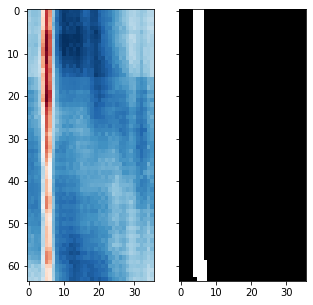

-------------------- 
 (64, 36) 
 (64, 36)


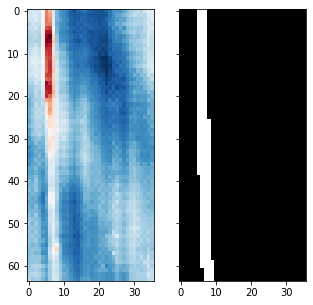

-------------------- 
 (64, 36) 
 (64, 36)


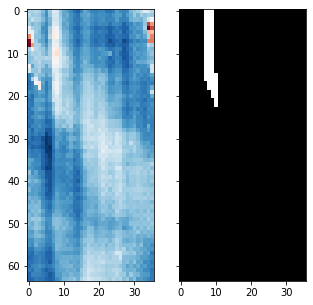

-------------------- 
 (64, 36) 
 (64, 36)


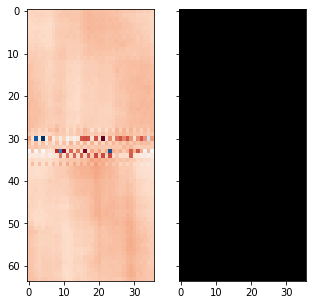

-------------------- 
 (64, 36) 
 (64, 36)


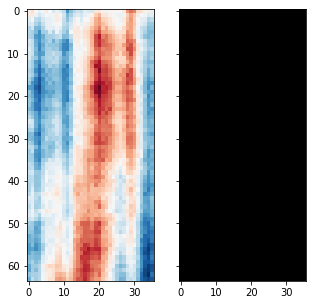

-------------------- 
 (64, 36) 
 (64, 36)


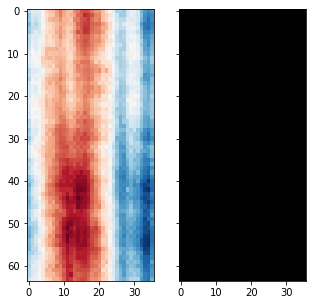

-------------------- 
 (64, 36) 
 (64, 36)


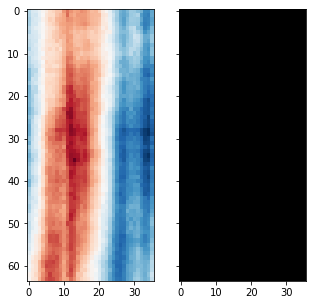

-------------------- 
 (64, 36) 
 (64, 36)


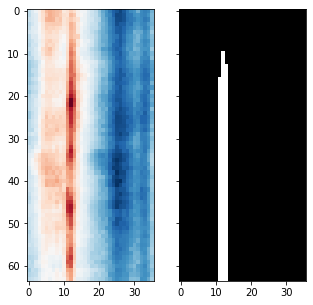

-------------------- 
 (64, 36) 
 (64, 36)


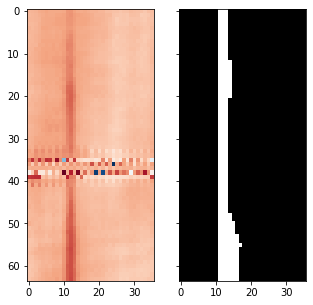

-------------------- 
 (64, 36) 
 (64, 36)


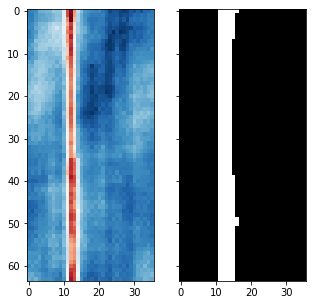

-------------------- 
 30_17b-A26_dwl_DWL_OTHER_46824462_15B
size of image: (12800, 36)
proportion of labels: 76.9140625 %
-------------------- 
 (64, 36) 
 (64, 36)


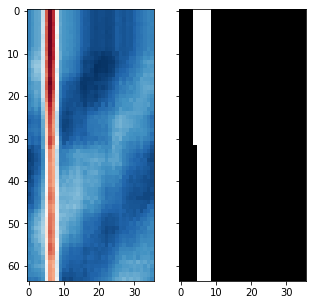

-------------------- 
 (64, 36) 
 (64, 36)


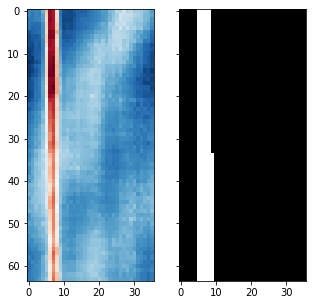

-------------------- 
 (64, 36) 
 (64, 36)


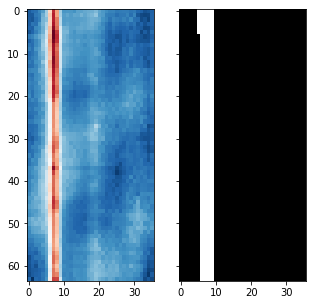

-------------------- 
 (64, 36) 
 (64, 36)


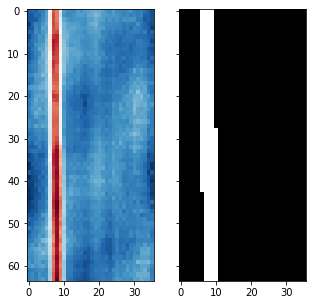

-------------------- 
 (64, 36) 
 (64, 36)


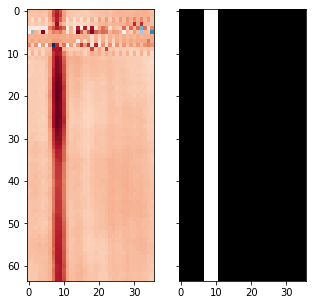

-------------------- 
 (64, 36) 
 (64, 36)


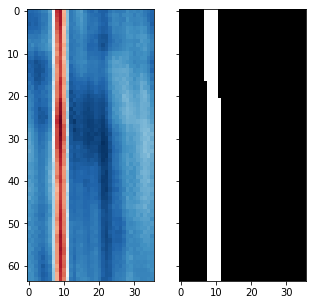

-------------------- 
 (64, 36) 
 (64, 36)


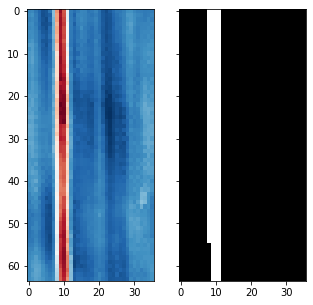

-------------------- 
 (64, 36) 
 (64, 36)


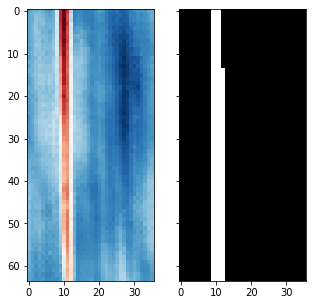

-------------------- 
 (64, 36) 
 (64, 36)


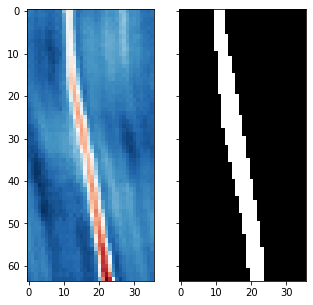

-------------------- 
 (64, 36) 
 (64, 36)


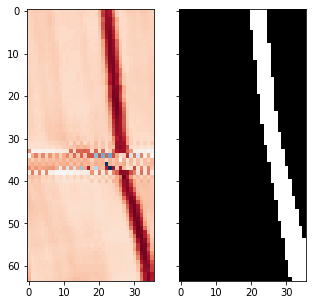

-------------------- 
 30_17b-A26_dwl_DWL_OTHER_46815407_15B
size of image: (68580, 36)
proportion of labels: 92.03703703703704 %
-------------------- 
 (64, 36) 
 (64, 36)


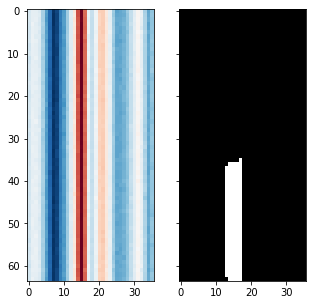

-------------------- 
 (64, 36) 
 (64, 36)


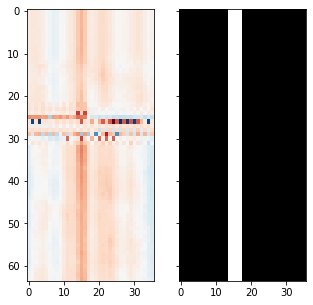

-------------------- 
 (64, 36) 
 (64, 36)


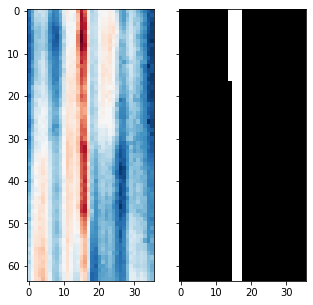

-------------------- 
 (64, 36) 
 (64, 36)


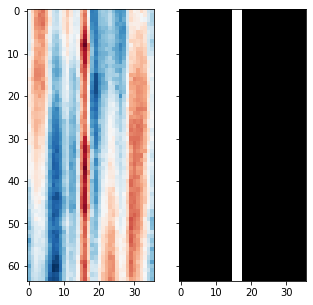

-------------------- 
 (64, 36) 
 (64, 36)


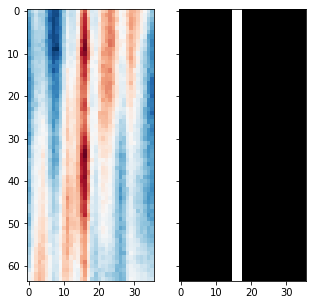

-------------------- 
 (64, 36) 
 (64, 36)


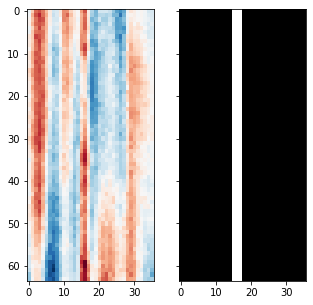

-------------------- 
 (64, 36) 
 (64, 36)


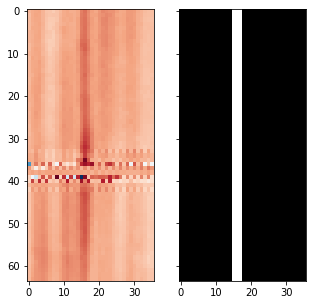

-------------------- 
 (64, 36) 
 (64, 36)


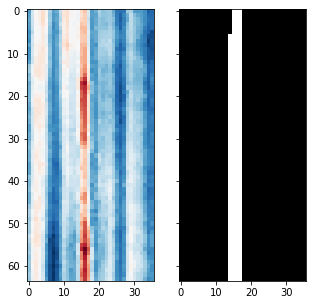

-------------------- 
 (64, 36) 
 (64, 36)


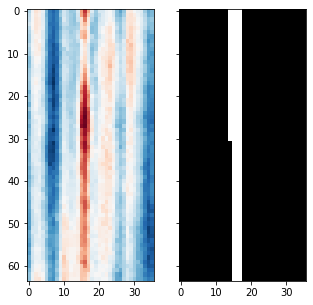

-------------------- 
 (64, 36) 
 (64, 36)


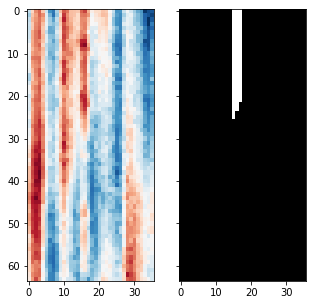

In [14]:
# load validation data
display = True 
save_dir_val = './TP4/data/Val'
list_val_wells, list_val_img, list_val_label = load_data(save_dir_val)


In [15]:
# load test data
display = False
save_dir_test = './TP4/data/Test'
list_test_wells, list_test_img, list_test_label = load_data(save_dir_test)

5
-------------------- 
 211_29-A47_dwl_DWL_WIRE_256691557_30B
size of image: (16616, 36)
proportion of labels: 0.0 %
-------------------- 
 211_29-A22Z_dwl_DWL_WIRE_265959676_30B
size of image: (906, 36)
proportion of labels: 0.0 %
-------------------- 
 211_29-D65Z_dwl_1993345_15B
size of image: (2044, 36)
proportion of labels: 99.85322896281801 %
-------------------- 
 211_29-A22Z_dwl_DWL_WIRE_265959847_30B
size of image: (1126, 36)
proportion of labels: 72.29129662522202 %
-------------------- 
 22_11-N6_dwl_DWL_OTHER_159382242_15B
size of image: (70744, 36)
proportion of labels: 80.30080289494515 %


## 1.2 Data distribution: validation and training

In [16]:
scale = 1

for i in range(len(list_train_img)):
    
    x_tmp, y_tmp = create_patches_scale(list_train_img[i], list_train_label[i], size_image_model, scale)
    
    if i == 0:
        x_train = x_tmp
        y_train = y_tmp
    else:
        x_train = np.vstack((x_train, x_tmp))
        y_train = np.vstack((y_train, y_tmp))
    
    print('training: ' + str(x_train.shape))
    
for i in range(len(list_val_img)):

    x_tmp, y_tmp = create_patches_scale(list_val_img[i], list_val_label[i], size_image_model, scale)
    
    if i == 0:
        x_val = x_tmp
        y_val = y_tmp
    else:
        x_val = np.vstack((x_val, x_tmp))
        y_val = np.vstack((y_val, y_tmp))
        
    print('validation: ' + str(x_val.shape))
        
for i in range(len(list_test_img)):

    x_tmp, y_tmp = create_patches_scale(list_test_img[i], list_test_label[i], size_image_model, scale)
    
    if i == 0:
        x_test = x_tmp
        y_test = y_tmp
    else:
        x_test = np.vstack((x_test, x_tmp))
        y_test = np.vstack((y_test, y_tmp))
    
    print('test: ' + str(x_test.shape))

training: (1513, 64, 64)
training: (1927, 64, 64)
training: (2081, 64, 64)
training: (2123, 64, 64)
training: (2148, 64, 64)
training: (2169, 64, 64)
training: (2211, 64, 64)
training: (2453, 64, 64)
training: (2513, 64, 64)
training: (2558, 64, 64)
training: (4333, 64, 64)
training: (4353, 64, 64)
validation: (204, 64, 64)
validation: (560, 64, 64)
validation: (2465, 64, 64)
test: (462, 64, 64)
test: (488, 64, 64)
test: (545, 64, 64)
test: (577, 64, 64)
test: (2543, 64, 64)


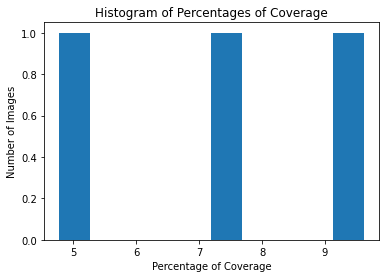

In [17]:
# Compute the percentage of coverage in y_train
total_pixels_train = y_train.size
ones_train = y_train.sum()
percent_coverage_train = ones_train / total_pixels_train * 100

# Compute the percentage of coverage in y_val
total_pixels_val = y_val.size
ones_val = y_val.sum()
percent_coverage_val = ones_val / total_pixels_val * 100

# Compute the percentage of coverage in y_test
total_pixels_test = y_test.size
ones_test = y_test.sum()
percent_coverage_test = ones_test / total_pixels_test * 100

# Plot a histogram of the percentages of coverage
percentages = [percent_coverage_train, percent_coverage_val, percent_coverage_test]
plt.hist(percentages, bins=10)
plt.xlabel('Percentage of Coverage')
plt.ylabel('Number of Images')
plt.title('Histogram of Percentages of Coverage')
plt.show()

## 1.3 Dataloader set up

`Create dictionary for Dataloader`

In [18]:
dict_patches = {'train': x_train,\
              'val': x_val,\
               'test': x_test}
dict_labels = {'train': y_train,\
              'val': y_val,\
               'test': y_test}

`Create Dataloaders`

In [19]:
image_datasets = {x: ImageCustomLoader_gray(dict_patches[x], dict_labels[x], size_image_model) for x in partitions[0:2]}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batchSize,\
                                              shuffle=shuffle_db) for x in partitions[0:2]}
dataset_sizes = {x: len(image_datasets[x]) for x in partitions[0:2]}
print('Data loaded correctly!')

Data loaded correctly!


# 2.Segmentation model

Segmentation models are a class of machine learning algorithms that are used for image analysis and computer vision tasks. The goal of a segmentation model is to take an input image and divide it into different segments, or regions, based on the content of the image. These models are often used in applications such as object detection, image recognition, and autonomous driving.

There are several types of segmentation models, including semantic segmentation, instance segmentation, and panoptic segmentation. Semantic segmentation involves dividing an image into different regions based on the semantic meaning of the objects in the image, such as cars, buildings, and pedestrians. Instance segmentation, on the other hand, involves dividing an image into different segments for each individual object in the image. Finally, panoptic segmentation combines elements of both semantic and instance segmentation to create a unified representation of an image that includes all objects and their semantic categories.

Segmentation models are typically trained on large datasets of labeled images using deep learning techniques such as convolutional neural networks (CNNs). These models can be quite complex and require significant computational resources to train and deploy. However, they have shown impressive performance on a wide range of image analysis tasks, making them an important tool for many applications in computer vision.

## 2.1 Simple Unet 

• The Unet model is a deep learning architecture for image segmentation.

• It was developed in 2015 by Olaf Ronneberger, Philipp Fischer, and Thomas Brox.

• The Unet architecture consists of a contracting path and an expansive path.

• The contracting path is made up of convolutional and pooling layers that downsample the input image.

• The expansive path is made up of upsampling and convolutional layers that upsample the image back to its original size.

• The architecture includes skip connections between the contracting and expansive paths that help to preserve image features during the downsampling and upsampling processes.

• The Unet model has several perks, including:
  - High accuracy: The Unet model has shown state-of-the-art performance on various image segmentation tasks.

- Small data requirements: The model can be trained effectively on small datasets, making it useful in situations where large labeled datasets are not available.

- Fast inference: The Unet model is fast and efficient during inference, making it suitable for real-time applications.

• Applications of the Unet model include:
- Medical image analysis: The Unet model has been used for tasks such as brain tumor segmentation, cell segmentation, and retinal vessel segmentation.

- Autonomous driving: The Unet model has been used for road segmentation and object detection in autonomous driving systems.

- Satellite imagery analysis: The Unet model has been used for land cover classification and building detection in satellite imagery.
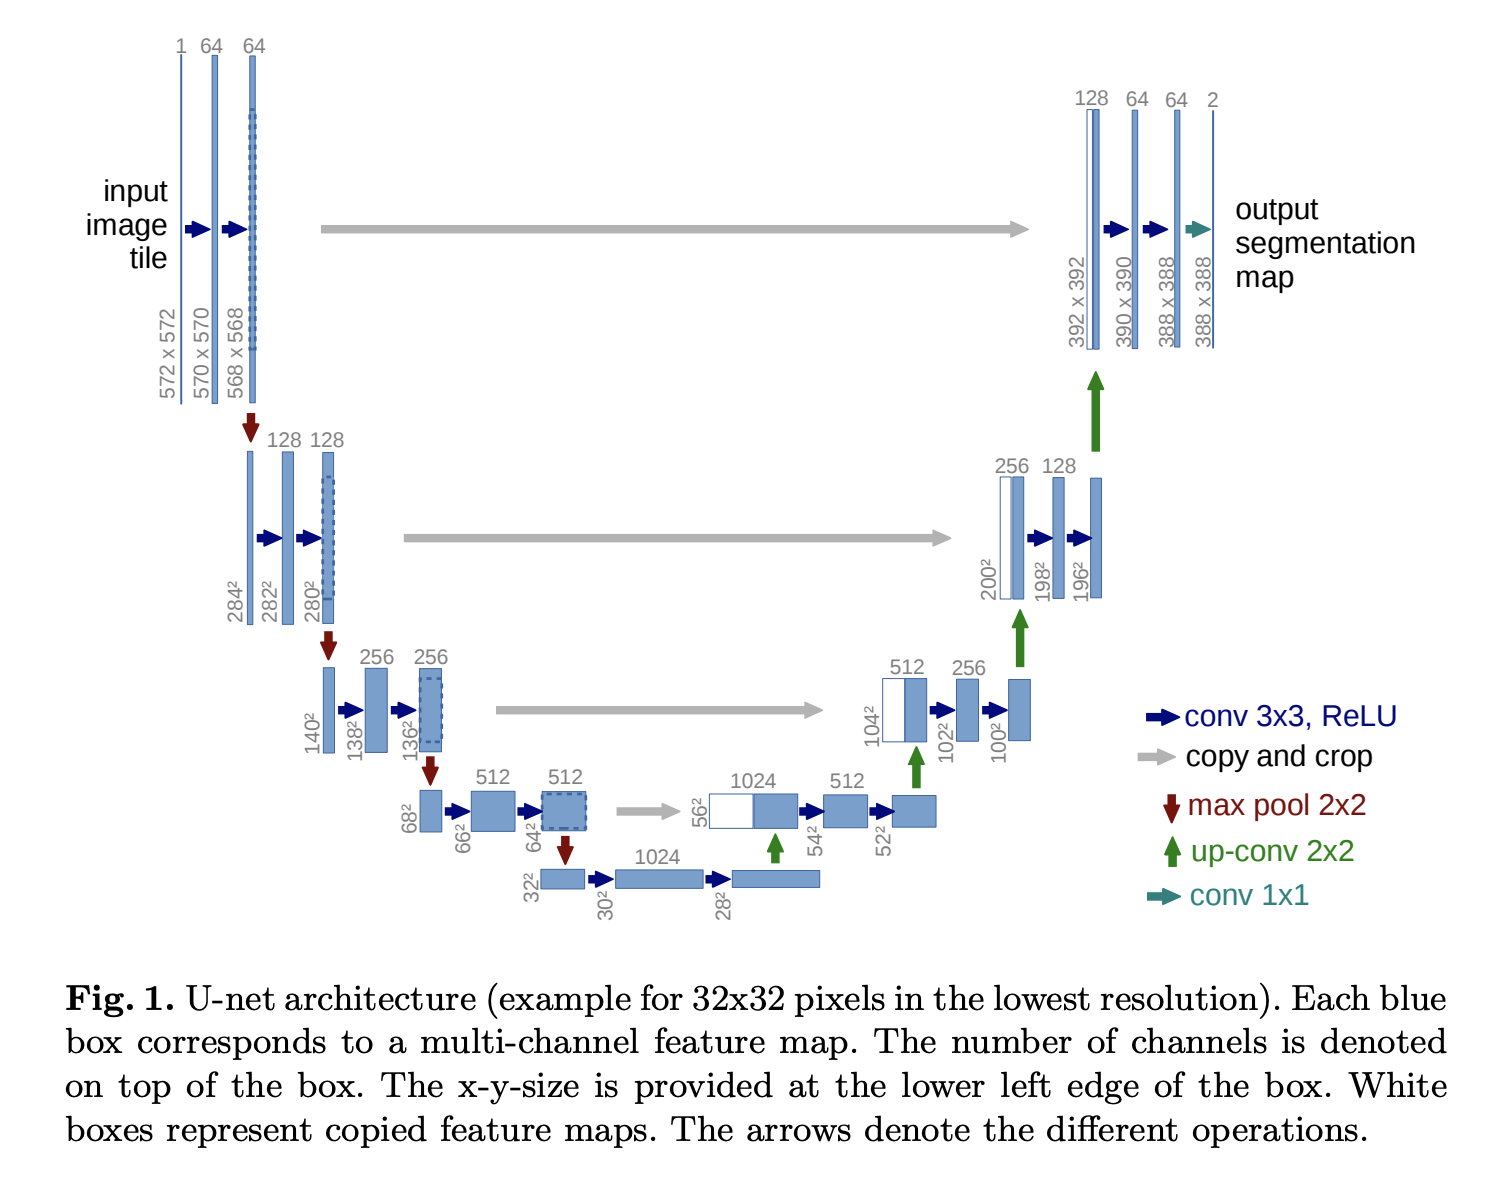

In [20]:
def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


class UNet(nn.Module):

    def __init__(self, n_class=1):
        super().__init__()
                
        self.dconv_down1 = double_conv(1, 64)
        self.dconv_down2 = double_conv(64, 128)
        self.dconv_down3 = double_conv(128, 256)
        self.dconv_down4 = double_conv(256, 512)        

        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)        
        
        self.dconv_up3 = double_conv(256 + 512, 256)
        self.dconv_up2 = double_conv(128 + 256, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
        
    def forward(self, x):
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)
        
        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)   
        
        x = self.dconv_down4(x)
        
        x = self.upsample(x)        
        x = torch.cat([x, conv3], dim=1)
        
        x = self.dconv_up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)       

        x = self.dconv_up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)   
        
        x = self.dconv_up1(x)
        
        out = self.conv_last(x)
        out = torch.sigmoid(out)
        return out

## 2.2 Transfer learning 

Transfer learning can be used in the encoder part of the Unet by using a pre-trained convolutional neural network (CNN) as the backbone of the encoder. The idea is to use the pre-trained weights of the CNN to initialize the weights of the encoder in the Unet model, and then fine-tune the weights on the specific segmentation task at hand. This can potentially save time and improve performance, especially in situations where limited labeled data is available.

Here are some reasons why transfer learning might not perform well in the encoder part of the Unet:

• Incompatibility of pre-trained CNN: The features learned by the pre-trained CNN may not be suitable for the specific segmentation task. This can lead to suboptimal performance or even worse performance compared to training from scratch.

• Overfitting: The pre-trained CNN may be too complex for the segmentation task, leading to overfitting of the encoder weights on the limited labeled data available. This can result in poor generalization performance on unseen data.

• Mismatched input image size: The input image size of the pre-trained CNN may not match the input image size of the Unet model, leading to difficulties in fine-tuning the weights and reducing performance.

• Encoding bottleneck: The encoder part of the Unet model may not have enough capacity to capture the high-level features of the input image, leading to information loss and reduced performance. In this case, transfer learning from a pre-trained CNN may not be beneficial.

In [21]:
class TransferUNet(nn.Module):
    
    def __init__(self, n_class=1):
        super().__init__()
        
        # Load the ResNet backbone and freeze its parameters
        resnet = models.resnet34(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad = True
        
        # Replace the first convolution layer of the ResNet to accept a single-channel input
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Extract the convolution layers from the ResNet backbone
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4
        
        # Create the UNet decoder
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dconv_up3 = double_conv(512 + 256, 256)
        self.dconv_up2 = double_conv(256 + 128, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        self.conv_last = nn.Conv2d(64, 64, kernel_size=1)
        self.final_conv = nn.Conv2d(64, n_class, kernel_size=1)
    def forward(self, x):
        # Pass input through ResNet layers
        conv1 = self.conv1(x)
        conv1 = self.bn1(conv1)
        conv1 = self.relu(conv1)
        x = self.maxpool(conv1)

        conv2 = self.layer1(x)
        conv3 = self.layer2(conv2)
        conv4 = self.layer3(conv3)
        conv5 = self.layer4(conv4)
        
        # Pass feature maps through UNet decoder
        x = self.upsample(conv5)
        x = torch.cat([x, conv4], dim=1)
        x = self.dconv_up3(x)
        x = self.upsample(x)
        x = torch.cat([x, conv3], dim=1)
        x = self.dconv_up2(x)
        x = self.upsample(x)
        x = torch.cat([x, conv2], dim=1)
        x = self.dconv_up1(x)
        x = self.upsample(x)
        out = self.conv_last(x)
        x = self.upsample(out)
        out=self.final_conv(x)
        out = torch.sigmoid(out)
        return out

    
def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )

In [22]:
import torch
import torch.nn as nn
import torchvision.models as models

class TransferUNet(nn.Module):
    
    def __init__(self, n_class=1):
        super().__init__()
        
        # Load the ResNet backbone and freeze its parameters
        resnet = models.resnet18(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad = True
        
        # Replace the first convolution layer of the ResNet to accept a single-channel input
        resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        
        # Extract the convolution layers from the ResNet backbone
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        self.relu = resnet.relu
        self.maxpool = resnet.maxpool
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4
        
        # Create the UNet decoder
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dconv_up3 = double_conv(512 + 256, 256)
        self.dconv_up2 = double_conv(256 + 128, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        self.conv_last = nn.Conv2d(64, 64, kernel_size=1)
        self.final_conv = nn.Conv2d(64, n_class, kernel_size=1)
    def forward(self, x):
        # Pass input through ResNet layers
        conv1 = self.conv1(x)
        conv1 = self.bn1(conv1)
        conv1 = self.relu(conv1)
        x = self.maxpool(conv1)

        conv2 = self.layer1(x)
        conv3 = self.layer2(conv2)
        conv4 = self.layer3(conv3)
        conv5 = self.layer4(conv4)
        
        # Pass feature maps through UNet decoder
        x = self.upsample(conv5)
        x = torch.cat([x, conv4], dim=1)
        x = self.dconv_up3(x)
        x = self.upsample(x)
        x = torch.cat([x, conv3], dim=1)
        x = self.dconv_up2(x)
        x = self.upsample(x)
        x = torch.cat([x, conv2], dim=1)
        x = self.dconv_up1(x)
        x = self.upsample(x)
        out = self.conv_last(x)
        x = self.upsample(out)
        out=self.final_conv(x)
        out = torch.sigmoid(out)
        return out

    
def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )


## 2.3 Training

In [27]:
from torchsummary import summary
import torch
import torch.nn as nn


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# set the benchmark flag to True
torch.backends.cudnn.benchmark = False
model = UNet()
model = model.to(device)

summary(model, input_size=(1, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]             640
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6          [-1, 128, 32, 32]          73,856
              ReLU-7          [-1, 128, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]         147,584
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         295,168
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         590,080
             ReLU-14          [-1, 256,

`The binary cross-entropy (BCE)` loss function can be used for segmentation tasks where the goal is to classify each pixel in the image as either belonging to the object of interest (foreground) or the background. Here are some reasons why BCE loss can be a suitable choice for segmentation tasks:

• The `BCE` loss is a commonly used loss function in binary classification tasks, and segmentation can be seen as a type of binary classification problem where each pixel is classified as either foreground or background.

• The `BCE` loss is a probabilistic measure of the difference between the predicted probabilities and the true labels. In segmentation tasks, the predicted probabilities can be interpreted as the pixel-wise probability of belonging to the foreground, and the true labels can be represented as binary masks indicating the ground truth segmentation.

• The `BCE` loss is computationally efficient and easy to optimize using standard backpropagation algorithms. This makes it well-suited for large-scale segmentation tasks with large datasets and complex architectures.

• The BCE loss is robust to class imbalance, which is a common issue in segmentation tasks where the foreground class is often much smaller than the background class. The BCE loss penalizes false positives and false negatives equally, which can help to balance the training process.

In [28]:
# set the benchmark flag to True
torch.backends.cudnn.benchmark = False
criterionBCE = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
scheduler = [] 

train || epoch-0: lossB = 0.01160
val || epoch-0: lossB = 0.01233


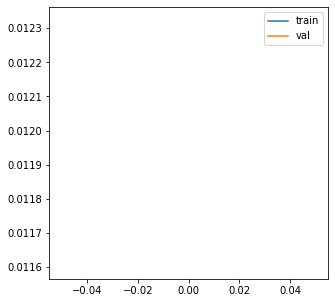

train || epoch-1: lossB = 0.00843
val || epoch-1: lossB = 0.01061


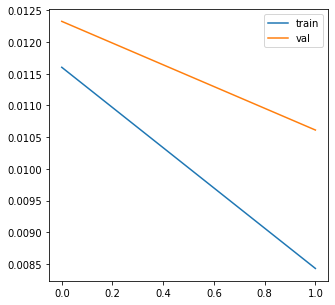

train || epoch-2: lossB = 0.00815
val || epoch-2: lossB = 0.00914


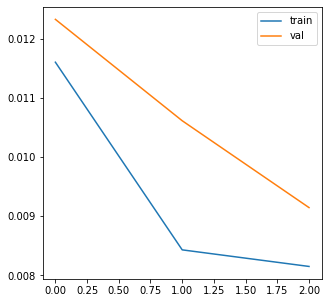

train || epoch-3: lossB = 0.00763
val || epoch-3: lossB = 0.00758


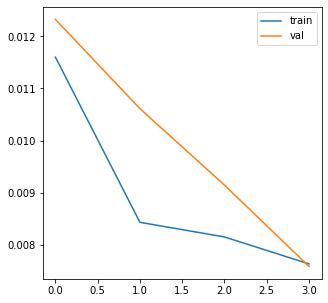

train || epoch-4: lossB = 0.00703
val || epoch-4: lossB = 0.00643


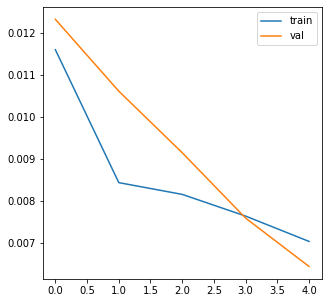

train || epoch-5: lossB = 0.00671
val || epoch-5: lossB = 0.00978


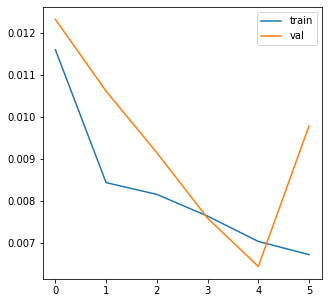

train || epoch-6: lossB = 0.00685
val || epoch-6: lossB = 0.00625


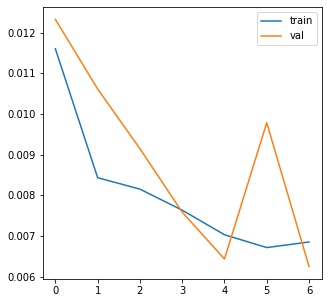

train || epoch-7: lossB = 0.00647
val || epoch-7: lossB = 0.00740


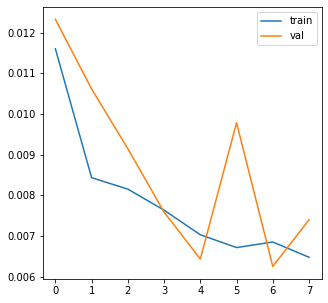

train || epoch-8: lossB = 0.00620
val || epoch-8: lossB = 0.00723


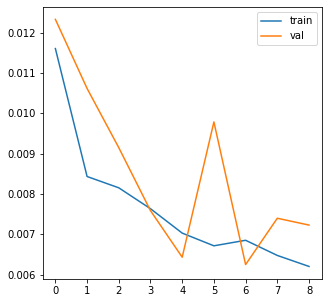

train || epoch-9: lossB = 0.00609
val || epoch-9: lossB = 0.00699


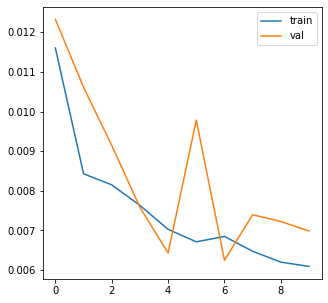

train || epoch-10: lossB = 0.00587
val || epoch-10: lossB = 0.00654


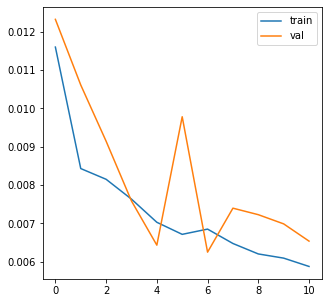

train || epoch-11: lossB = 0.00551
val || epoch-11: lossB = 0.00491


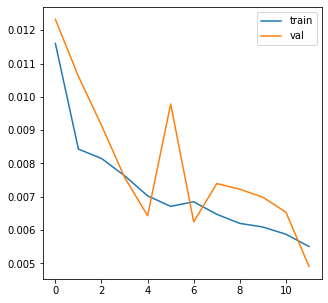

train || epoch-12: lossB = 0.00534
val || epoch-12: lossB = 0.00452


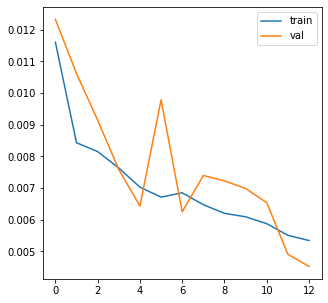

train || epoch-13: lossB = 0.00543
val || epoch-13: lossB = 0.00425


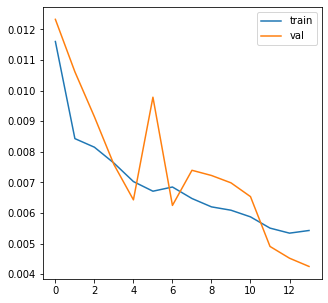

train || epoch-14: lossB = 0.00538
val || epoch-14: lossB = 0.00531


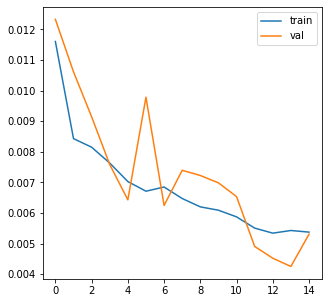

train || epoch-15: lossB = 0.00497
val || epoch-15: lossB = 0.00401


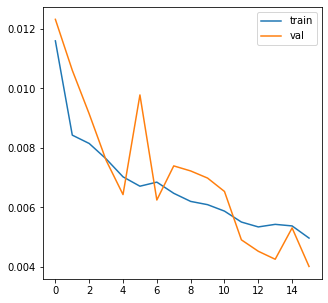

train || epoch-16: lossB = 0.00508
val || epoch-16: lossB = 0.00377


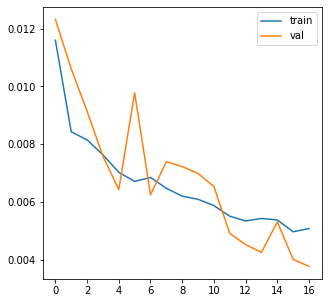

train || epoch-17: lossB = 0.00458
val || epoch-17: lossB = 0.00371


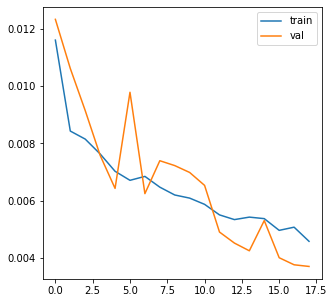

train || epoch-18: lossB = 0.00456
val || epoch-18: lossB = 0.00359


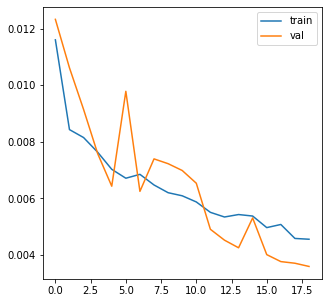

train || epoch-19: lossB = 0.00444
val || epoch-19: lossB = 0.00354


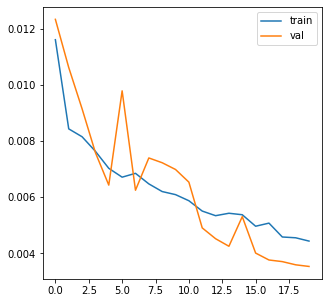

train || epoch-20: lossB = 0.00440
val || epoch-20: lossB = 0.00337


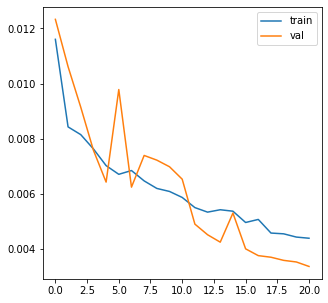

train || epoch-21: lossB = 0.00442
val || epoch-21: lossB = 0.00357


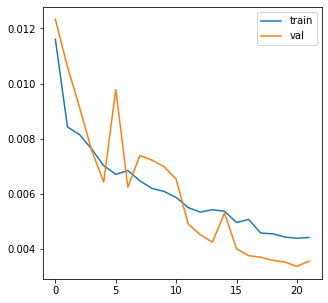

train || epoch-22: lossB = 0.00417
val || epoch-22: lossB = 0.00350


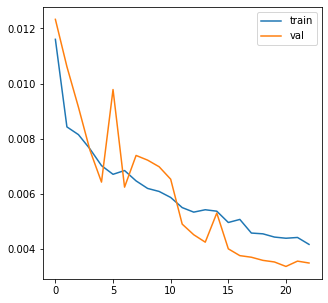

train || epoch-23: lossB = 0.00425
val || epoch-23: lossB = 0.00355


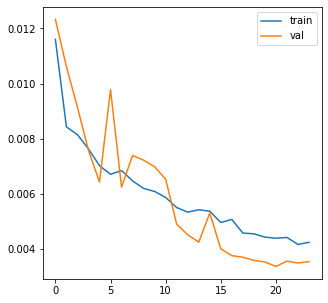

train || epoch-24: lossB = 0.00418
val || epoch-24: lossB = 0.00333


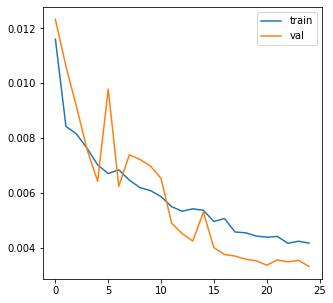

train || epoch-25: lossB = 0.00409
val || epoch-25: lossB = 0.00331


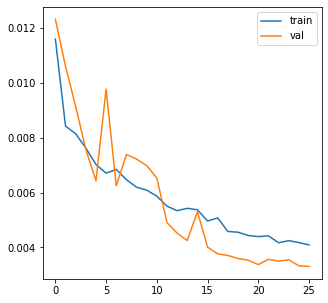

train || epoch-26: lossB = 0.00397
val || epoch-26: lossB = 0.00332


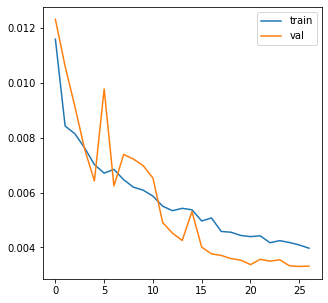

train || epoch-27: lossB = 0.00383
val || epoch-27: lossB = 0.00319


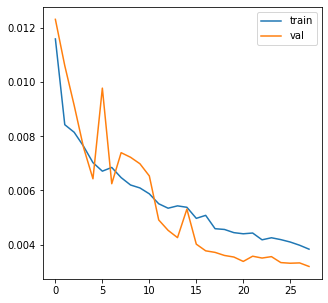

train || epoch-28: lossB = 0.00379
val || epoch-28: lossB = 0.00325


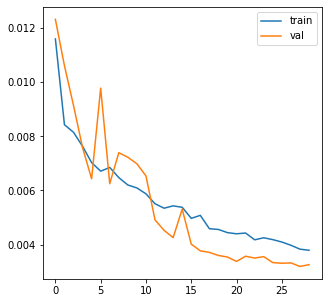

train || epoch-29: lossB = 0.00382
val || epoch-29: lossB = 0.00300


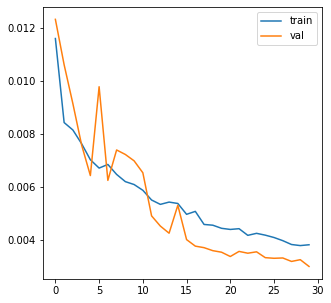

train || epoch-30: lossB = 0.00376
val || epoch-30: lossB = 0.00330


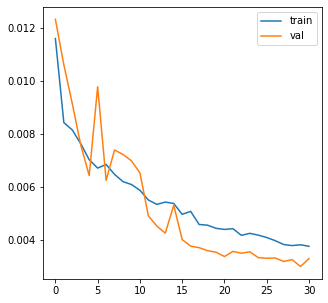

train || epoch-31: lossB = 0.00361
val || epoch-31: lossB = 0.00315


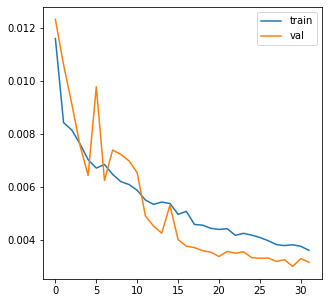

train || epoch-32: lossB = 0.00352
val || epoch-32: lossB = 0.00308


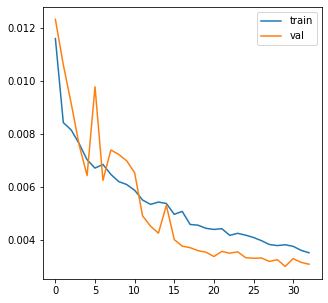

train || epoch-33: lossB = 0.00352
val || epoch-33: lossB = 0.00302


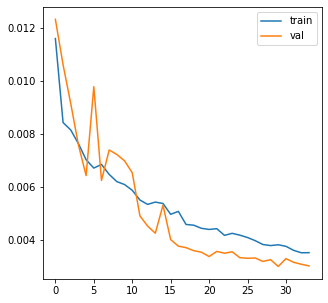

train || epoch-34: lossB = 0.00345
val || epoch-34: lossB = 0.00304


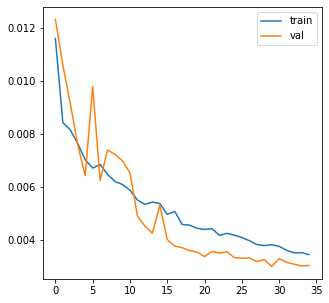

train || epoch-35: lossB = 0.00345
val || epoch-35: lossB = 0.00320


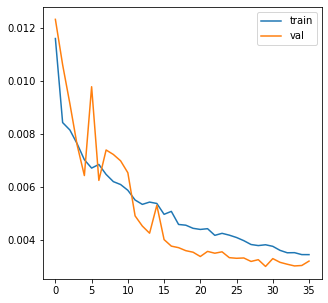

train || epoch-36: lossB = 0.00335
val || epoch-36: lossB = 0.00306


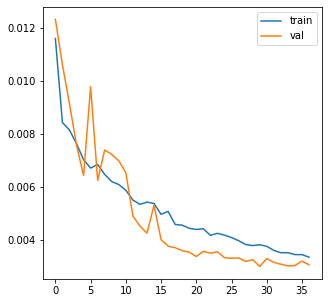

train || epoch-37: lossB = 0.00334
val || epoch-37: lossB = 0.00304


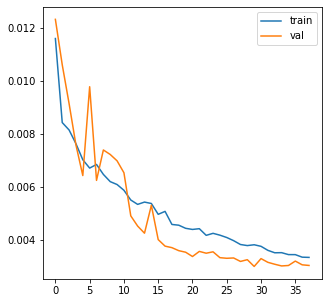

train || epoch-38: lossB = 0.00327
val || epoch-38: lossB = 0.00310


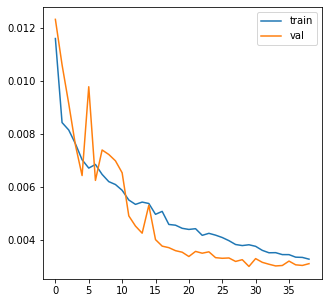

train || epoch-39: lossB = 0.00320
val || epoch-39: lossB = 0.00303


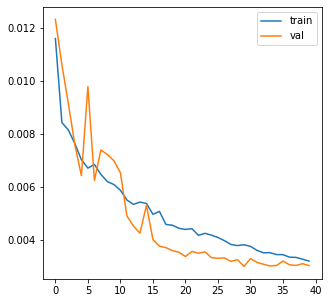

train || epoch-40: lossB = 0.00317
val || epoch-40: lossB = 0.00302


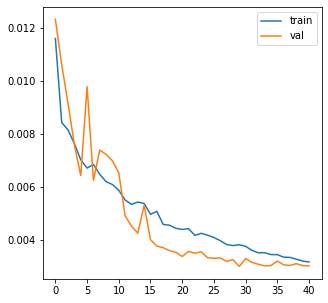

train || epoch-41: lossB = 0.00312
val || epoch-41: lossB = 0.00297


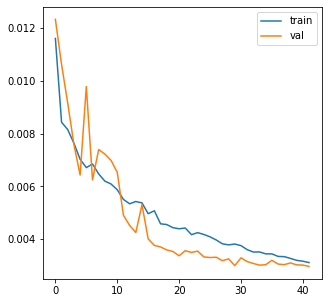

train || epoch-42: lossB = 0.00310
val || epoch-42: lossB = 0.00282


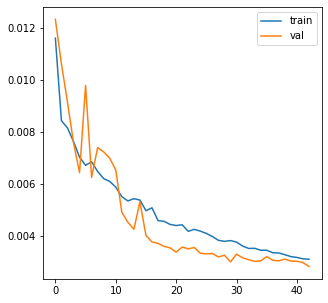

train || epoch-43: lossB = 0.00302
val || epoch-43: lossB = 0.00297


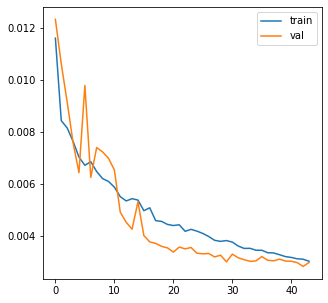

train || epoch-44: lossB = 0.00298
val || epoch-44: lossB = 0.00306


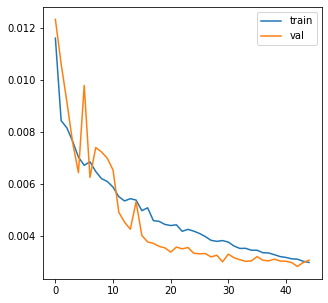

train || epoch-45: lossB = 0.00291
val || epoch-45: lossB = 0.00309


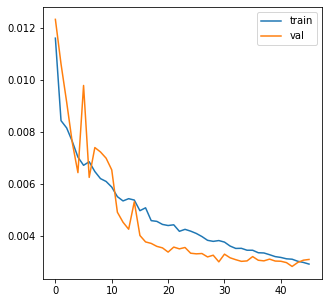

train || epoch-46: lossB = 0.00290
val || epoch-46: lossB = 0.00309


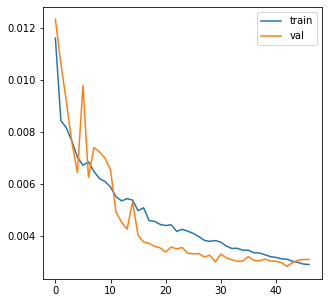

train || epoch-47: lossB = 0.00291
val || epoch-47: lossB = 0.00288


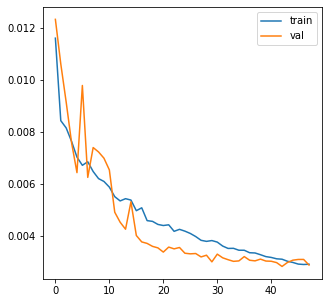

train || epoch-48: lossB = 0.00291
val || epoch-48: lossB = 0.00311


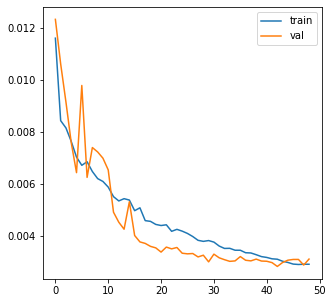

train || epoch-49: lossB = 0.00290
val || epoch-49: lossB = 0.00312


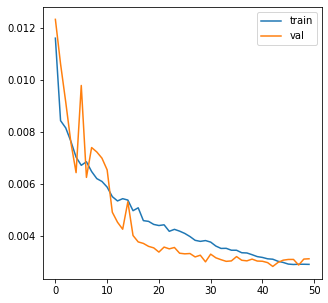

train || epoch-50: lossB = 0.00284
val || epoch-50: lossB = 0.00302


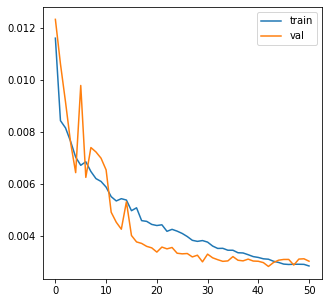

train || epoch-51: lossB = 0.00288
val || epoch-51: lossB = 0.00300


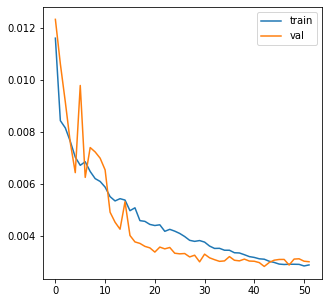

train || epoch-52: lossB = 0.00280
val || epoch-52: lossB = 0.00295


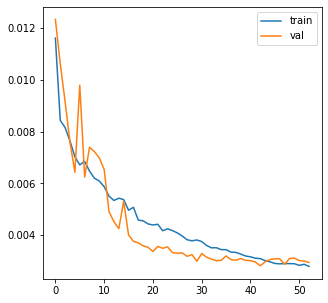

train || epoch-53: lossB = 0.00280
val || epoch-53: lossB = 0.00292


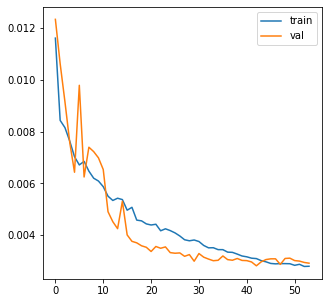

train || epoch-54: lossB = 0.00275
val || epoch-54: lossB = 0.00289


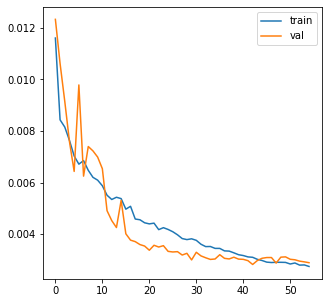

In [29]:
num_channels=1
train_process = training_train_val(model, num_channels, optimizer, criterionBCE, path2Save, num_epochs, partitions[0:2], dataloaders, device, dataset_sizes,  initial_epoch, scheduler)
train_process.train()

## 2.4 Analysis and vizualization 

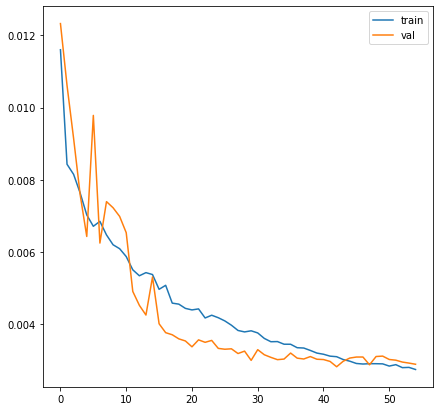

In [30]:
loss_information = pd.read_csv('/content/TP4/Unet/loss_file.csv') 

loss_train = loss_information.train
#loss_train = ndimage.median_filter(loss_train, size=5)

loss_val = loss_information.val
#loss_val = ndimage.median_filter(loss_val, size=5)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.plot(loss_train, label="train")
ax.plot(loss_val, label="val")
ax.legend()

## 2.5 Evaluation

In [31]:
image_datasets = {x: ImageCustomLoader_gray(dict_patches[x], dict_labels[x], size_image_model) for x in [partitions[2]]}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,\
                                              shuffle=False) for x in [partitions[2]]}
dataset_sizes = {x: len(image_datasets[x]) for x in [partitions[2]]}
print('Data loaded correctly!')
dataset_sizes

Data loaded correctly!


{'test': 2543}

In [32]:
model.eval()
val_dataFrame = {}
val_dataFrame['label'] = []
val_dataFrame['prediction'] = []  
iter = 0
tolerance = 0
for  iteration, batch_data in enumerate(dataloaders['test']):
    patches, labels  = batch_data  
    
    if num_channels == 1:
        patches = patches.unsqueeze(1)
    patches = patches.float()

    patches = patches.to(device)
    labels = labels.to(device)
    
    groove_pred = model(patches)
    groove_pred = groove_pred.to(device)
    
    labels_np = labels.squeeze().cpu().numpy()
    groove_pred_np = (groove_pred.squeeze().detach().cpu().numpy())#seg_dip.squeeze().detach().cpu().numpy()#
    #seg_dip_np = seg_dip.squeeze().detach().cpu().numpy()
    
#     if (iter % 20) == 0:
#         fig, ax = plt.subplots(1, 1)
#         #ax.imshow(seg_dip_np_previous)
#         ax.imshow(seg_dip.squeeze().detach().cpu().numpy())
    
    patches_2Display = patches.squeeze().cpu().numpy()#np.transpose(patches.squeeze().cpu().numpy(), (1,2,0))
    v_min = np.min(patches_2Display)#[:,:,0]
    v_max = np.max(patches_2Display)#[:,:,0]
#     if labels_np.sum()>0:
#         show_images([ patches_2Display, labels_np, seg_dip_np],\
#                ['img','label','pred'], './' ,v_min, v_max,save=False, display=True)
    val_dataFrame['label'].append(labels_np)
    val_dataFrame['prediction'].append(groove_pred_np)
    
    iter = iter + 1

val_dataFrame['label'] = np.asarray(val_dataFrame['label'])
val_dataFrame['prediction'] = np.asarray(val_dataFrame['prediction'])

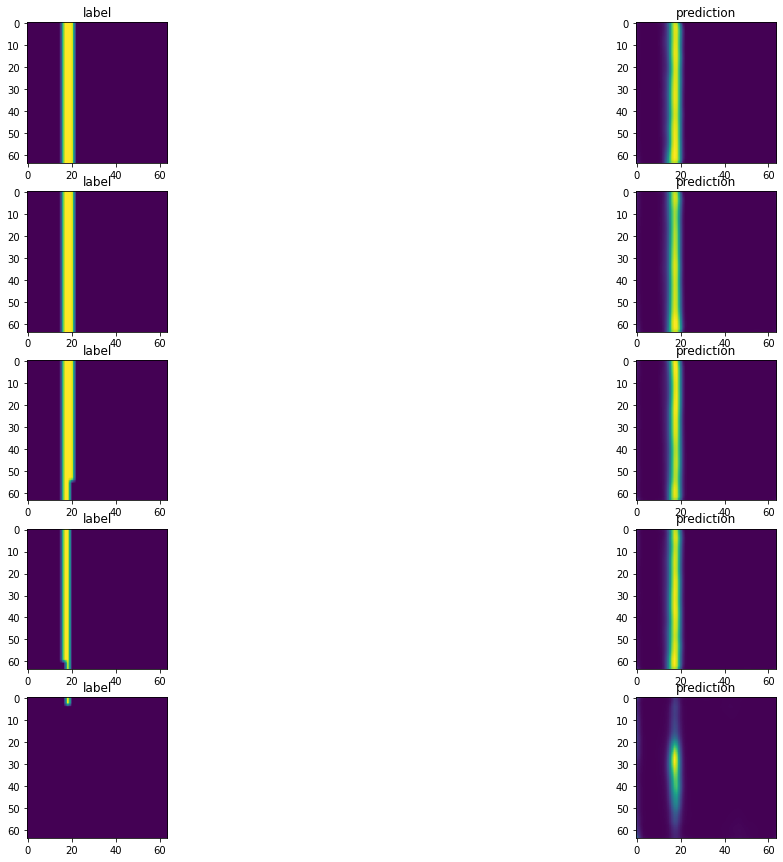

In [37]:
#display the results for 10 images
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
for i in range(5):
    ax[i,0].imshow(val_dataFrame['label'][i+1000])
    ax[i,1].imshow(val_dataFrame['prediction'][i+1000])
    ax[i,0].set_title('label')
    ax[i,1].set_title('prediction')
    

In [38]:
#IoU metric to evaluate the results
def IoU_metric(prediction, label):
    intersection = np.logical_and(prediction, label)
    union = np.logical_or(prediction, label)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

#compute the IoU for all the images
IoU = []
for i in range(len(val_dataFrame['label'])):
    IoU.append(IoU_metric(val_dataFrame['prediction'][i], val_dataFrame['label'][i]))

print('The mean IoU is: ', np.mean(IoU))


The mean IoU is:  0.06483015375310486


# 3 . CONCLUSION

In conclusion, this project aimed to segment corrosion in well images using various architectures of the U-Net model, including transfer learning. Despite experimenting with transfer learning, the results showed that a simple U-Net performed exceptionally well on the given data. This project highlights the importance of selecting the appropriate architecture for a given task and emphasizes that more complex models do not always lead to better results. Overall, the successful application of the U-Net model to segment corrosion in well images holds significant potential for real-world applications, such as in the oil and gas industry.